<a href="https://colab.research.google.com/github/jeddyclass/202207.NCUT/blob/main/session_05_chi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import warnings
from matplotlib.font_manager import fontManager

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## **卡方分配與自由度**

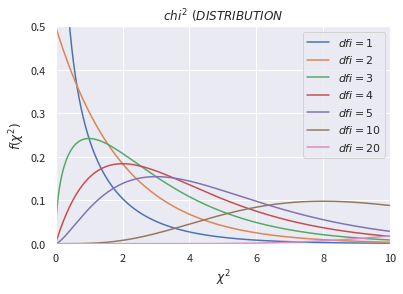

In [11]:
from scipy import stats

x=np.linspace(0,10,1000)
fig,ax=plt.subplots(1,1)
dof=[1,2,3,4,5,10,20]
for dofi in zip(dof):
  ax.plot(x, stats.chi2.pdf(x, dofi), label=r'$dfi=%i$' % dofi)

plt.xlim(0,10)
plt.ylim(0,0.5)
plt.xlabel('$\chi^2$')
plt.ylabel(r'$f(\chi^2)$')
plt.title(r'$chi^2\ \mathrm{(}DISTRIBUTION}$')
plt.legend()
plt.show()

## **骰子公不公正**

In [16]:
chi2, p_value = stats.chisquare([12,20,24,19,27,18], f_exp=[20,20,20,20,20,20])
print(chi2)
print(p_value)

6.7
0.2439246425643036


## **PTT的例題**

In [21]:
#----------------------------------------
#         |非常  ｜同意 ｜不同 ｜非常
#         |同意  ｜　　 ｜意　 ｜不同意
#----------------------------------------
#男生      |24    |36   |56   |84
#女生      |16    |18   |62   |104
#----------------------------------------
T = np.array([
                [24,36,56,84],
                [16,18,62,104]
])
chi2, p, dof, ex = stats.chi2_contingency(T, correction=False)
print(chi2)
print(dof)
print(p)

10.032744320230798
3
0.018289837600185262


In [19]:
#----------------------------------------
#         |非常  ｜同意 ｜不同 ｜非常
#         |同意  ｜　　 ｜意　 ｜不同意
#----------------------------------------
#男生      |24    |36   |56   |84
#常態      |10%   |20%  |30%  |40%
#常態      |20    |40   |60   |80
#----------------------------------------
T = np.array([
                [24,36,56,84],
                [20,40,60,80]
])
chi2, p, dof, ex = stats.chi2_contingency(T, correction=False)
print(chi2)
print(dof)
print(p)

0.8096546895183521
3
0.8471563926587452


In [20]:
#----------------------------------------
#         |非常  ｜同意 ｜不同 ｜非常
#         |同意  ｜　　 ｜意　 ｜不同意
#----------------------------------------
#女生      |16    |18   |62   |104
#常態      |10%   |20%  |30%  |40%
#常態      |20    |40   |60   |80
#----------------------------------------
T = np.array([
                [16,18,62,104],
                [20,40,60,80]
])
chi2, p, dof, ex = stats.chi2_contingency(T, correction=False)
print(chi2)
print(dof)
print(p)

11.95249369850594
3
0.007547681425268042


## **使用鳶尾花來試試**

In [3]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
sns.set(style='darkgrid')
plt.rcParams['axes.unicode_minus']=False
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')
plt.rcParams['font.family']='Taipei Sans TC Beta'

--2022-07-11 06:08:26--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.213.138, 173.194.213.113, 173.194.213.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.213.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ob78i1ggv9piih6ktpd58knjvka4kqkc/1657519650000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=c859444a-b9a8-400f-8e9d-68077796bfb1 [following]
--2022-07-11 06:08:28--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ob78i1ggv9piih6ktpd58knjvka4kqkc/1657519650000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=c859444a-b9a8-400f-8e9d-68077796bfb1
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 173.194.212.132, 2607:f8b0:400c:c11::84
Connecting to d

In [4]:
#載入數據
iris=load_iris()
print(iris.data[:10],iris.target[:10])
#iris.feature_names:特徵列名稱(sepal lenght/sepal width/petal length/petal width)
#iris.target_name:鳶尾花名(setosa/versicolor/virginica)
print(iris.feature_names,iris.target_names)
iris_df= pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
iris_df = iris_df.drop('target', axis=1)
iris_df

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]] [0 0 0 0 0 0 0 0 0 0]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 虛無假設 Ho: 變數甲(花萼長SepalLengthCm/花萼寬SepalWidthCm/花瓣長PetalLengthCm/花瓣寬PetalLengthCm)和變數乙(花的種類Species) 是獨立不相關的

## 對立假設 H1: 變數甲(花萼長SepalLengthCm/花萼寬SepalWidthCm/花瓣長PetalLengthCm/花瓣寬PetalLengthCm)和變數乙(花的種類Species) 不是獨立、相關的

## Significance level : 0.05

In [29]:
# ref: https://www.kaggle.com/code/aniketg11/iris-dataset-with-statistical-tests/notebook
from scipy.stats import chi2_contingency
from scipy.stats import chi2

chi_squared_stat, p_value, dof, expected=chi2_contingency(pd.crosstab(iris_df['species'], iris_df['sepal length (cm)']))
print("chi_squared_stat :", chi_squared_stat)
probability=0.95
critical=chi2.ppf(probability, dof)
if abs(chi_squared_stat)>=critical:
    print('Dependent : Reject Hypothesis 0 (null Hypothesis)')
elif abs(chi_squared_stat)<critical:
    print('Inependent : Fail to Reject Hypothesis 0 (null Hypothesis)')
    
alpha = 1.0 - probability
print('Significance {0}, {1}'.format(alpha, p_value))
if p_value<=alpha:
    print("Dependent : Reject Hypothesis 0 (null Hypothesis)")
else:
    print('Inependent : Fail to Reject Hypothesis 0 (null Hypothesis)')
        
    print('================================================================')

chi_squared_stat : 156.26666666666668
Dependent : Reject Hypothesis 0 (null Hypothesis)
Significance 0.050000000000000044, 6.665987344005466e-09
Dependent : Reject Hypothesis 0 (null Hypothesis)
